In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# load data
df = pd.read_csv('results/experiment_results_exp-3.csv')
df.columns

# compute accuracy and recall for each doas estimated by each method within a threshold of 10 degrees

def calc_ae(a,b):
    x = np.abs(a-b)
    return np.min(np.array((x, np.abs(360-x))), axis=0)

df['ang_error'] = calc_ae(
    np.rad2deg(df['doas_est_az']), 
    np.rad2deg(df['doas_ref_az'])
)

ang_error_threshold = [5, 10, 15, 20]
for thr in ang_error_threshold:
    df[f'ang_error_less_{thr}'] = df['ang_error'] <= thr

# compute accuracy and recall based on the frame id as in DCASE Task 3
unique_frame_ids = df['frame_id'].unique()

for frame_id in unique_frame_ids:
    df_frame = df[df['frame_id'] == frame_id]
        
    # for each method
    method_ids = df_frame['method_id'].unique()
    
    for method_id in method_ids:
        df_method = df_frame[df_frame['method_id'] == method_id]    
        
        nSrcs = df_method['n_sources'].values[0]
        assert len(df_method) == np.unique(df_method['doas_est_az']).shape[0] == np.unique(df_method['n_sources'])
        
        # accuracy
        for thr in ang_error_threshold:
            accuracy = np.sum(df_method[f'ang_error_less_{thr}']) / len(df_method)
            df.loc[df_method.index, f'accuracy_{thr}'] = accuracy
            
            # error as the mean angular error for the matched doa
            error = np.mean(df_method[df_method[f'ang_error_less_{thr}']]['ang_error'])
            df.loc[df_method.index, f'mean_error_{thr}'] = error
            

In [145]:
print('accuracy_5 - the higher the better')
df[
        df['sv_method'].isin(["alg", "ref"])
].pivot_table(
        values='accuracy_10', 
        columns=['n_sources'],
        index=['loc_method' , 'sv_method'], 
        aggfunc='mean'
).style.background_gradient(cmap='viridis', axis=1)

accuracy_5 - the higher the better


In [ ]:
print('accuracy_10 - the higher the better')
df[
        df['sv_method'].isin(["alg", "ref"])
].pivot_table(
        values='accuracy_10', 
        columns=['n_sources'],
        index=['loc_method' , 'sv_method'], 
        aggfunc='mean'
).style.background_gradient(cmap='viridis', axis=1)

accuracy_10 - the higher the better


In [148]:
print('error_5 - the lower the better')
df[
        df['sv_method'].isin(["alg", "ref"])
].pivot_table(
        values='mean_error_5', 
        columns=['n_sources'],
        index=['loc_method' , 'sv_method'], 
        aggfunc='mean'
).style.background_gradient(cmap='viridis', axis=1)     

error_5 - the lower the better


In [142]:
print('error_10 - the lower the better')
df[
        df['sv_method'].isin(["alg", "ref"])
].pivot_table(
        values='mean_error_10', 
        columns=['n_sources'],
        index=['loc_method' , 'sv_method'], 
        aggfunc='mean'
).style.background_gradient(cmap='viridis', axis=1)

error_10 - the lower the better


In [149]:
print('error_15 - the lower the better')
df[
        df['sv_method'].isin(["alg", "ref"])
].pivot_table(
        values='mean_error_15', 
        columns=['n_sources'],
        index=['loc_method' , 'sv_method'], 
        aggfunc='mean'
).style.background_gradient(cmap='viridis', axis=1)     

error_15 - the lower the better


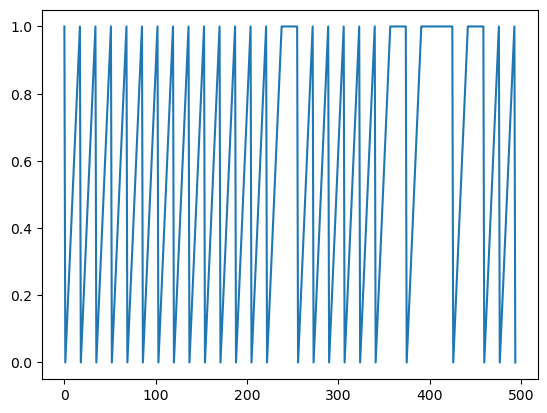

In [143]:
plt.plot(df[
        (df['sv_method'].isin(['alg', 'ref']))
        & (df['n_sources'].isin([1]))
]['ang_error_less_5'])

In [112]:
df[
        (df['sv_method'].isin(['alg', 'ref']))
        & (df['n_sources'].isin([2]))
].pivot_table(
        values='ang_error_less_5', 
        columns=['sv_method', 'nObs', 'seed', 'n_sources'],
        index=['loc_method' , 'noise_type'], 
        aggfunc='mean'
).style.background_gradient(cmap='viridis', axis=1)

,sv_method,alg,ref
,nObs,8,8
,seed,13,13
,n_sources,2,2
loc_method,noise_type,,
alpha-1.2_beta_2_eps-1E-3_iter-500,white,0.200000,0.650000
music,white,0.050000,0.900000
srp_phat,white,0.300000,0.800000
